In [1]:
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold

from sklearn import manifold
import scipy.io as sio
import matplotlib.pyplot as plt

import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

## BEST ROC-AUC RESULTS ARE OBTAINED WITH THE COMBINATION DTW_D + KERNEL + NU-SVM, OUT OF A TOTAL OF 81% ROC-AUC

In [2]:
## BEST ROC-AUC RESULTS ARE OBTAINED WITH THE COMBINATION DTW_D + KERNEL + NU-SVM, OUT OF A TOTAL OF 81% ROC-AUCdef plotTSNE(X,y, name, value):
def plotTSNE(X,y, name, value):
    red = y == 0
    green = y == 1

    plt.figure(figsize=(8,8))
    tsne = manifold.TSNE(n_components=2, init='random', perplexity=value, random_state=0)
    Y = tsne.fit_transform(X)
    principalDf = pd.DataFrame(data = Y, columns = ['pca1', 'pca2'])
    
    class_0 = np.where(y == 0)
    class_1 = np.where(y == 1)
    
    plt.scatter(Y[class_0, 0], Y[class_0, 1], marker='o', color='green')
    plt.scatter(Y[class_1, 0], Y[class_1, 1], marker='x', color='blue')
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim(-80, 60)
    plt.xlim(-70, 70)
    plt.legend(['non-MDR', 'MDR'],prop={'size': 16})
    plt.grid()
    plt.tight_layout()
    plt.savefig(name + '.pdf')
    
    return principalDf

def printApacheSaps(data1, data2, data3, ylim):
    name_cluster = ["derecho", "inferior", "izquierdo", "central_inf", "central_sup"]
    mr = tuple(data1)
    nomr = tuple(data2)
    allpat = tuple(data3)
    # nomr = tuple(values_nomr)

    # create plot
    fig, ax = plt.subplots(figsize=(8, 5))
    index = np.arange(len(name_cluster))
    bar_width = 0.25
    opacity = 1

    rects1 = plt.bar(index + 0.7, mr, bar_width, alpha=opacity, color='b', label='MDR')
    #autolabel(rects1,plt)

    rects2 = plt.bar(index +  0.7 + bar_width, nomr, bar_width, alpha=0.85, color='g', label='non-MDR')
    # #autolabel(rects2,plt)

    rects3 = plt.bar(index +  0.7 + 2*bar_width, allpat, bar_width, alpha=0.4, color='g', label='all')

    axis_font = {'size':'20'}
    plt.xticks(index + 0.7 + bar_width, tuple(name_cluster))
    plt.legend(prop={'size': 16})

    import matplotlib 
    plt.xticks(rotation=90)
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20) 
    plt.ylim(0, ylim)

    ax.yaxis.grid(linestyle = 'dashed')  # grid lines
    ax.set_axisbelow(True)  # grid lines are behind the rest

    
def infoSapsAndApache(var, analisis):

    arr_all = []
    values = analisis[[var]][var].values
    for i in range(int(analisis.shape[0]/7)):
        if ~np.isnan(values[i*7]):
            arr_all.append(values[i*7])

    df_aux_all = pd.DataFrame(arr_all, columns=[var])


    arr_MR = []
    analisis_MR = analisis[analisis.MR == 1]

    values = analisis_MR[[var]][var].values
    for i in range(int(analisis_MR.shape[0]/7)):
        if ~np.isnan(values[i*7]):
            arr_MR.append(values[i*7])

    df_aux_MR = pd.DataFrame(arr_MR, columns=[var])


    arr_noMR = []
    analisis_noMR = analisis[analisis.MR == 0]

    values = analisis_noMR[[var]][var].values
    for i in range(int(analisis_noMR.shape[0]/7)):
        if ~np.isnan(values[i*7]):
            arr_noMR.append(values[i*7])

    df_aux_noMR = pd.DataFrame(arr_noMR, columns=[var])

    
    return df_aux_all, df_aux_MR, df_aux_noMR

==================================>S1<=====================================
(842, 842)
(842, 1)


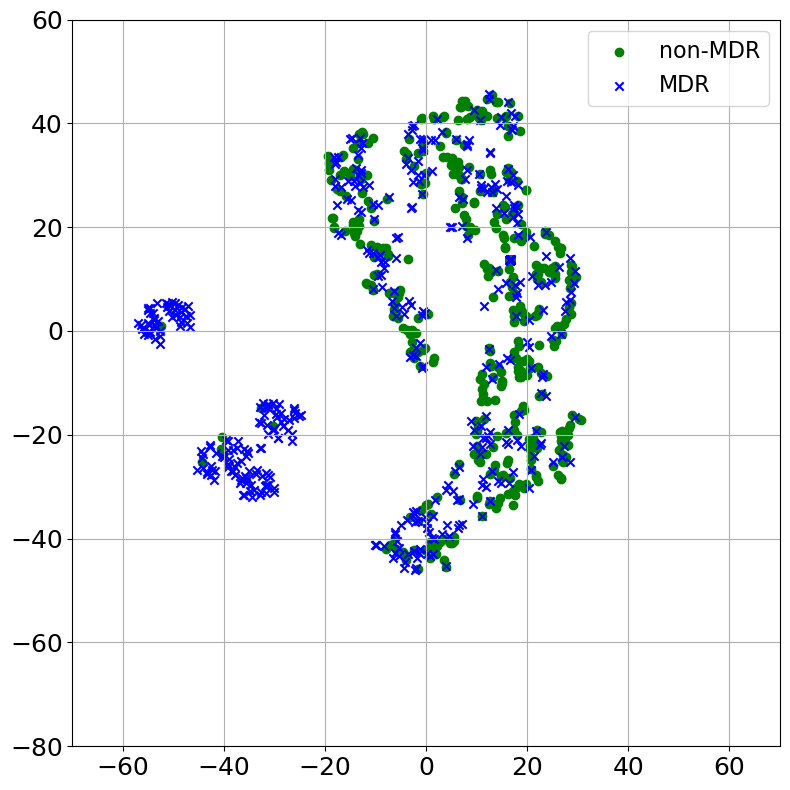

In [3]:
# %matplotlib notebook
folders = ["S1"]
method = "exponential"

i = 0
print("==================================>" + folders[i] + "<=====================================")
y_train = pd.read_csv('../df_to_load/DataToPaperAndTFM_Mod1/Subconjuntos_3D/' + folders[i] + '/y_train_tensor.csv')
X_train = sio.loadmat('../Step1_TCK/data_generated_by_tck/S1/Ktrtr')
X_train = X_train['Ktrtr']

print(X_train.shape)
print(y_train.shape)

df_TSNE = plotTSNE(X_train, y_train, 'TCK', 20)

df_TSNE = pd.read_csv("./0_TCK/clusters_bestROCAUC_TCK_5clusteres.csv")

## CLUSTER COMPOSITION ANALYSIS

In [4]:
print("All pat: ", df_TSNE.shape)

cluster_C1= df_TSNE[df_TSNE['labels'] == 0].reset_index()

cluster_C2 = df_TSNE[df_TSNE['labels'] == 1].reset_index()

cluster_C3 = df_TSNE[df_TSNE['labels'] == 2].reset_index()

cluster_C4 = df_TSNE[df_TSNE['labels'] == 3].reset_index()

cluster_C5 = df_TSNE[df_TSNE['labels'] == 4].reset_index()

All pat:  (842, 4)


In [5]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, '../Libraries_Paper')
import clusterAnalysis as ca

df_both = pd.read_csv("../df_to_load/Modelado_1/Datos_Originales/df_PreCovid.csv")

cluster_C1 = df_both[df_both.Admissiondboid.isin(cluster_C1.Admissiondboid.unique())]
print("cluster_C1: ", int(cluster_C1.shape[0]/7))

cluster_C2 = df_both[df_both.Admissiondboid.isin(cluster_C2.Admissiondboid.unique())]
print("cluster_C2: ", int(cluster_C2.shape[0]/7))

cluster_C3 = df_both[df_both.Admissiondboid.isin(cluster_C3.Admissiondboid.unique())]
print("cluster_C3: ", int(cluster_C3.shape[0]/7))

cluster_C4 = df_both[df_both.Admissiondboid.isin(cluster_C4.Admissiondboid.unique())]
print("cluster_C4: ", int(cluster_C4.shape[0]/7))

cluster_C5 = df_both[df_both.Admissiondboid.isin(cluster_C5.Admissiondboid.unique())]
print("cluster_C5: ", int(cluster_C5.shape[0]/7))


df_MR = pd.read_csv("./dfTFMFinalv6.csv", low_memory=False)

print("================================================================================")

df_MR = ca.buildSampledDataframes(df_MR, debug=False)

df_PreCovid = pd.read_csv("../df_to_load/Modelado_1/Datos_Originales/df_PreCovid.csv")
df_PreCovid = df_PreCovid.drop(['DaysOfStay'], axis=1)

df_MR = df_MR.drop(columns=['MR'], axis=1)
group = pd.merge(df_PreCovid, df_MR, on=['Admissiondboid'], how="left")

print("Nº patients: ", group.shape[0]/7)
print("\tMDR: ", group[group['MR'] == 1].shape[0]/7)
print("\t\tMDR<48h: ", group[(group['MR'] == 1) & (group['days_to_culture'] <= 48)].shape[0]/7)
print("\t\tMDR>48h: ", group[(group['MR'] == 1) & (group['days_to_culture'] > 48)].shape[0]/7)
print("\tNo-MDR: ", group[group['MR'] == 0].shape[0]/7)

cluster_C1:  107
cluster_C2:  326
cluster_C3:  281
cluster_C4:  47
cluster_C5:  81
Nº patients:  3310.0
	MDR:  597.0
		MDR<48h:  255.0
		MDR>48h:  342.0
	No-MDR:  2713.0


In [6]:
def getInfoCluster(analisis):
    hourPerTimeStep = 24
    numberOfTimeStep = 7
    
    print("Nº pat ttl cluster: ", analisis.shape[0]/7)
    print("===> % pat ttl cluster: ", np.round((analisis.shape[0]/7)/842, 4)*100)
    AMR_pat = analisis[analisis['MR'] == 1].reset_index(drop=True)
    noAMR_pat = analisis[analisis['MR'] == 0].reset_index(drop=True)
    print("\tNº pat no-MDR: ", noAMR_pat.shape[0]/7)
    aux = noAMR_pat.loc[noAMR_pat['DaysOfStay'] <= 2]
    print("\t\tNº pat no-MDR with stay < 48horas: ", aux.shape[0]/7)

    print("\tNº pat MDR: ", AMR_pat.shape[0]/7)
    print("===> % pat MDR: ", np.round((AMR_pat.shape[0]/7) / (analisis.shape[0]/7), 4)*100)
    print("\t\tNº pat MDR adquiring it in the first 48hours: ",  AMR_pat[AMR_pat['days_to_culture'] <= 48].shape[0]/7)
    
    df = noAMR_pat[['Admissiondboid', 'isVM']].groupby(by="Admissiondboid").sum().reset_index(drop=True)
    numPatWithVM_noAMR = np.sum(df.isVM != 0)
    numPatTtl_noAMR = df.shape[0]

    print("\nNº pat no-MDR totales: ", numPatTtl_noAMR)
    print("Nº pat no-MDR with MV: ", numPatWithVM_noAMR)
    print("%  pat no-MDR with MV: ", np.round(100*(numPatWithVM_noAMR/numPatTtl_noAMR), 4))

    df = AMR_pat[['Admissiondboid', 'isVM']].groupby(by="Admissiondboid").sum().reset_index(drop=True)
    numPatWithVM_AMR = np.sum(df.isVM != 0)
    numPatTtl_AMR = df.shape[0]

    print("\nNº total pat MDR: ", numPatTtl_AMR)
    print("Nº pat MDR with MV: ", numPatWithVM_AMR)
    print("% pat MDR with MV: ", np.round(100*(numPatWithVM_AMR/numPatTtl_AMR), 4))

    print("\nNº total pat: ", numPatTtl_noAMR+numPatTtl_AMR)
    print("Nº total pat with MV: ", numPatWithVM_noAMR+numPatWithVM_AMR)
    print("% total pat with VM: ", np.round(100*((numPatWithVM_AMR+numPatWithVM_noAMR)/(numPatTtl_AMR+numPatTtl_noAMR)), 4))
  

def getAntibioticsInfo(df_entry, path):
    
    df_aux = df_entry.groupby(by="Admissiondboid").sum().drop(['dayToDone'], axis=1).astype('int64')
    df_aux = df_aux[['AMG', 'ATF', 'CAR', 'CF1', 'CF2', 'CF3', 'CF4', 'Falta', 'GCC', 'GLI',
           'LIN', 'LIP', 'MAC', 'MON', 'NTI', 'OTR', 'OXA', 'PAP', 'PEN', 'POL',
           'QUI', 'SUL', 'TTC', 'MR']]

    keys = df_aux.keys()
    for i in range(len(keys)):
        df_aux[keys[i]].loc[df_aux[keys[i]] != 0] = 1

    porcentajesmr = []
    porcentajesnomr = []
    params = np.array(df_aux.keys())
    params = params[:-1]
    # -1 Para no entrar en MR
    for i in range(len(params)):
        MR = df_aux.loc[df_aux['MR'] == 1]
        porcentajesmr.append(round((MR[params[i]].sum()/MR.shape[0])*100,2))
        NoMR = df_aux.loc[df_aux['MR'] == 0]
        porcentajesnomr.append(round((NoMR[params[i]].sum()/NoMR.shape[0])*100,2))

    params[7] = 'Others'

    n_groups = 23
    mr = tuple(porcentajesmr)
    nomr = tuple(porcentajesnomr)

    fig, ax = plt.subplots(figsize=(7, 14))
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1

    rects1 = plt.barh(index + 0.7, mr, bar_width, alpha=opacity, color='b', label='MDR')
    #autolabel(rects1,plt)

    rects2 = plt.barh(index +  0.7 + bar_width, nomr, bar_width, alpha=opacity, color='g', hatch='/', label='non-MDR')
    #autolabel(rects2,plt)

    axis_font = {'size':'28'}
    #plt.ylabel('Percentage of patients', **axis_font)
    plt.yticks(index + 0.55 + bar_width, tuple(params))
    plt.legend(prop={'size': 28})
    #plt.xticks(rotation=90)

    import matplotlib 
    #plt.yticks(rotation=90)
    matplotlib.rc('xtick', labelsize=28) 
    matplotlib.rc('ytick', labelsize=28)
    plt.xlim(0, 100)

    #ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed', dash_joinstyle='bevel')
    ax.xaxis.grid(linestyle = 'dashed') 
    ax.set_axisbelow(True)  

    plt.tight_layout()

    plt.savefig(path, dpi = 600, bbox_inches='tight')
    
    #plt.savefig(path)

=============== cluster C1 =================
Nº pat ttl cluster:  107.0
===> % pat ttl cluster:  12.709999999999999
	Nº pat no-MDR:  7.0
		Nº pat no-MDR with stay < 48horas:  7.0
	Nº pat MDR:  100.0
===> % pat MDR:  93.46
		Nº pat MDR adquiring it in the first 48hours:  100.0

Nº pat no-MDR totales:  7
Nº pat no-MDR with MV:  5
%  pat no-MDR with MV:  71.4286

Nº total pat MDR:  100
Nº pat MDR with MV:  66
% pat MDR with MV:  66.0

Nº total pat:  107
Nº total pat with MV:  71
% total pat with VM:  66.3551

% de vecinos MR
cluster:  C1  -  15.7303
=============== cluster C2 =================
Nº pat ttl cluster:  326.0
===> % pat ttl cluster:  38.72
	Nº pat no-MDR:  191.0
		Nº pat no-MDR with stay < 48horas:  0.0
	Nº pat MDR:  135.0
===> % pat MDR:  41.410000000000004
		Nº pat MDR adquiring it in the first 48hours:  0.0

Nº pat no-MDR totales:  191
Nº pat no-MDR with MV:  148
%  pat no-MDR with MV:  77.4869

Nº total pat MDR:  135
Nº pat MDR with MV:  122
% pat MDR with MV:  90.3704

Nº 

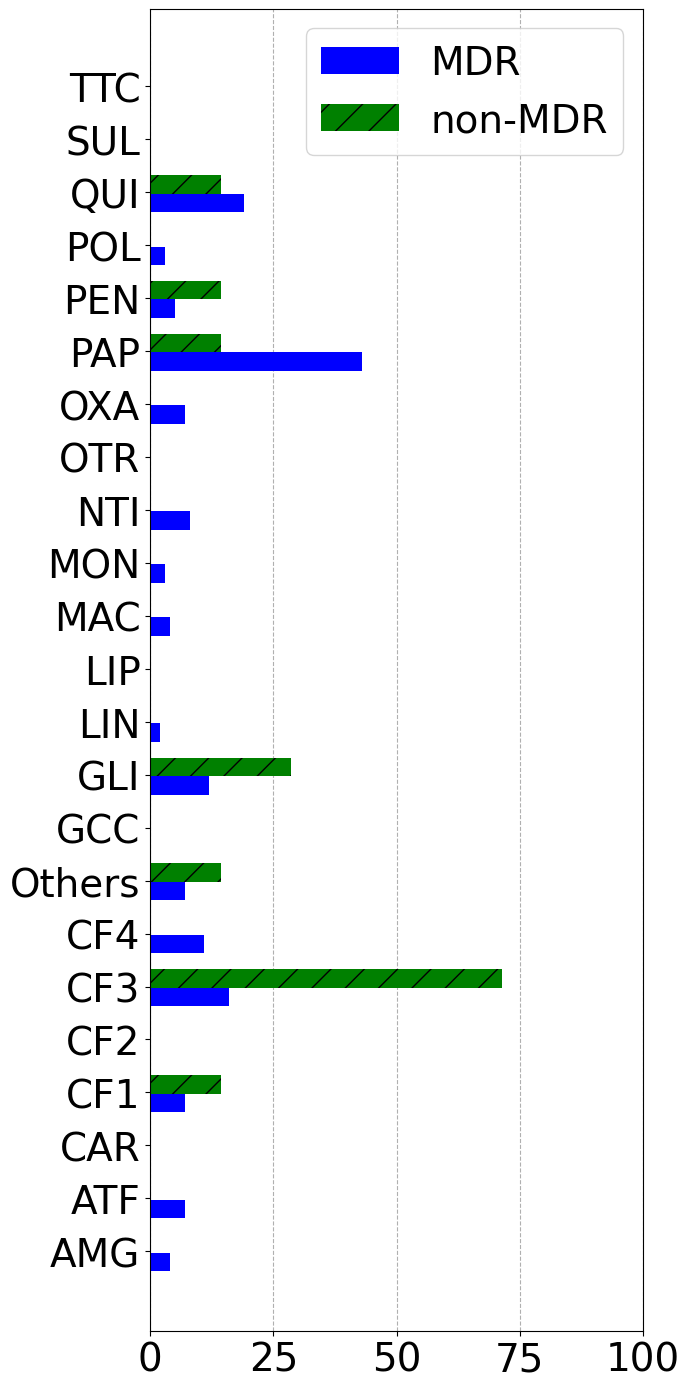

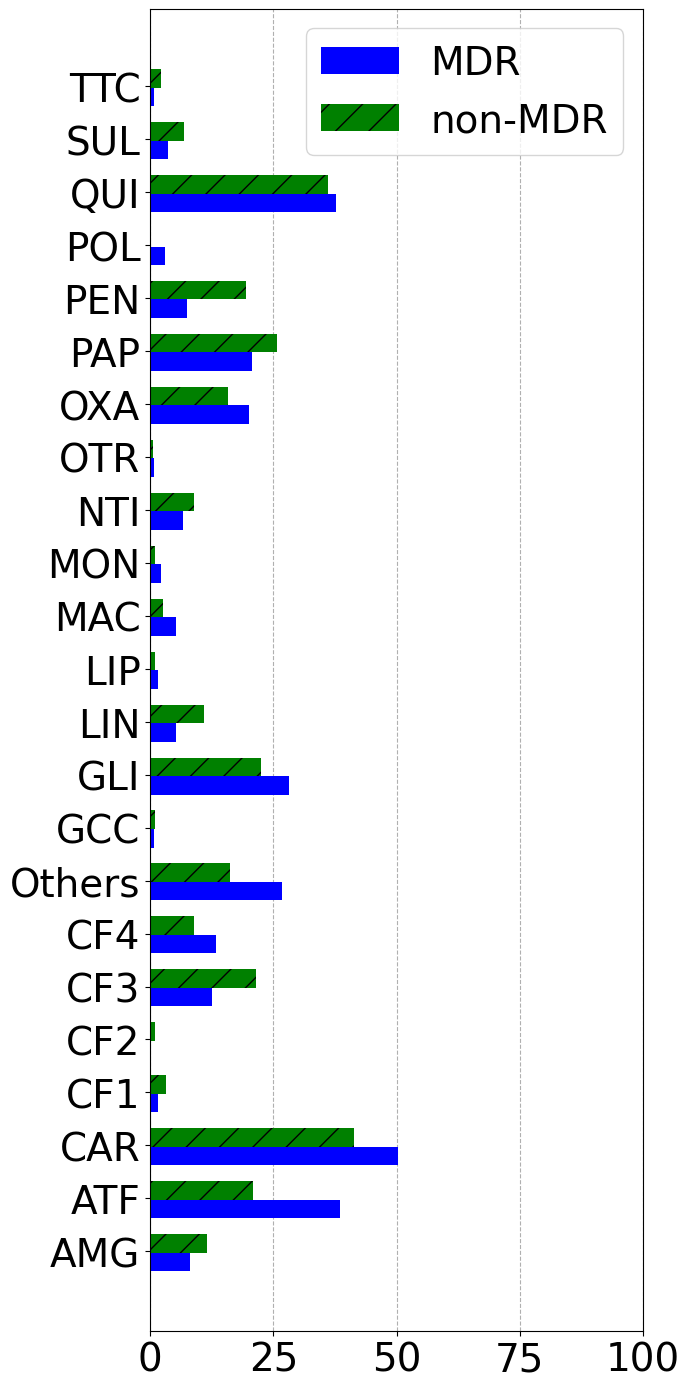

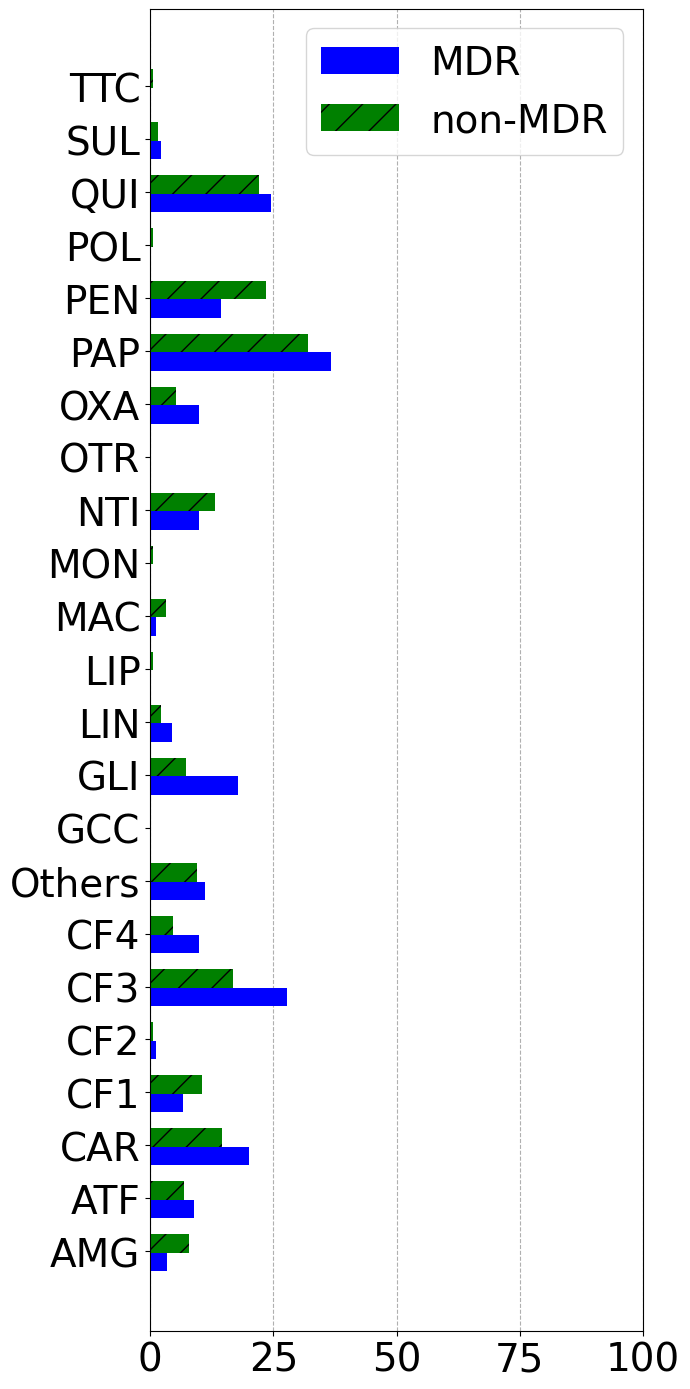

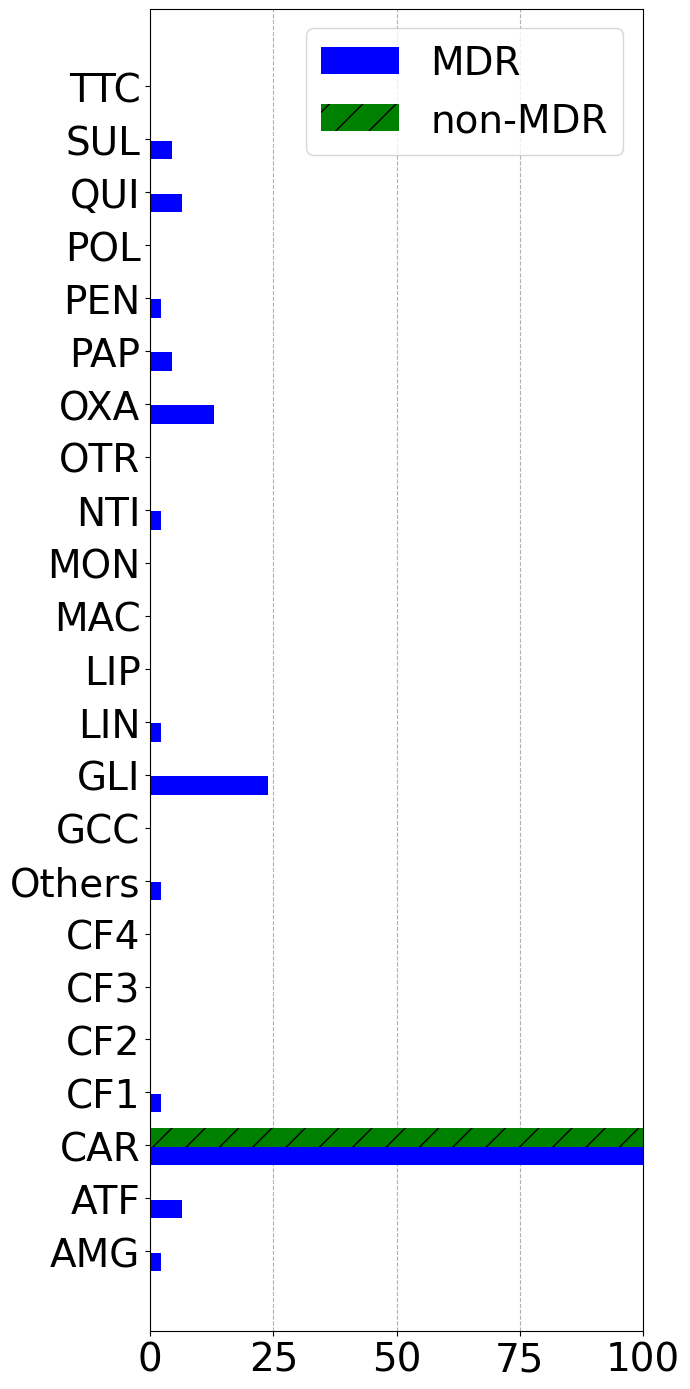

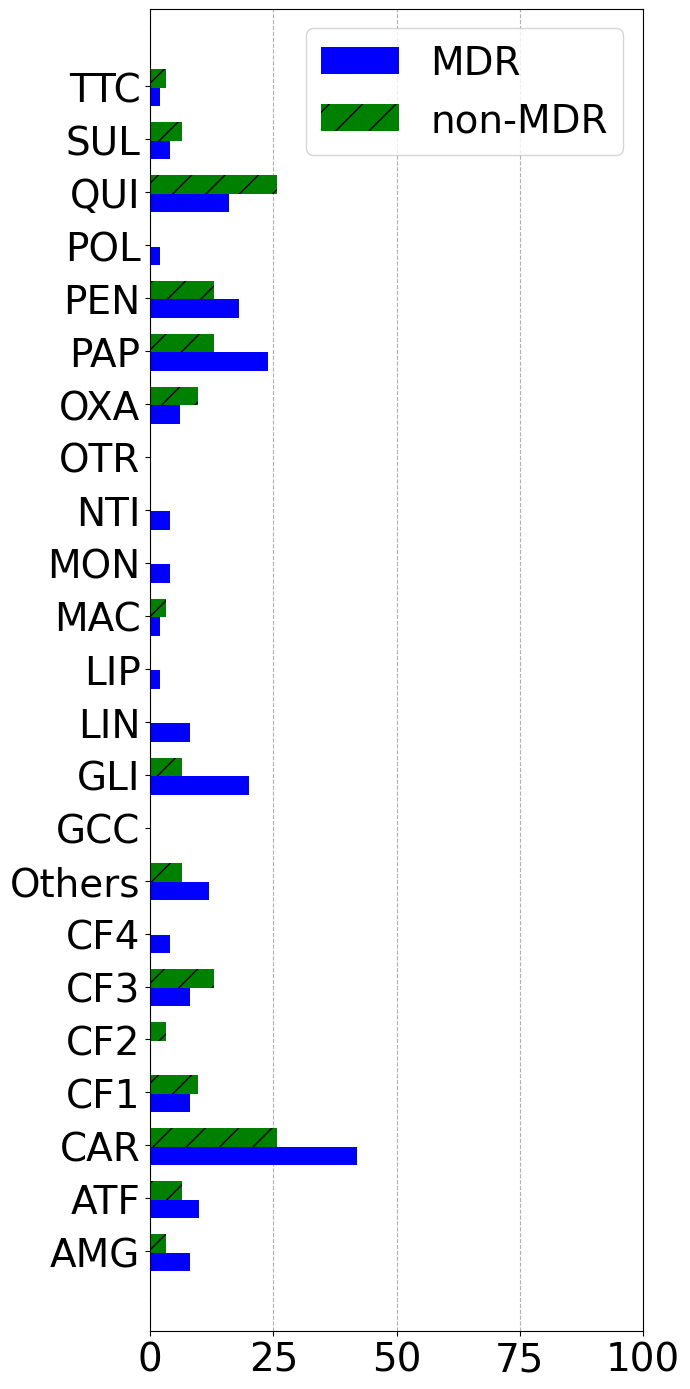

In [8]:
%matplotlib inline

clusters = [cluster_C1, cluster_C2, cluster_C3, cluster_C4, cluster_C5]
name_cluster = ["C1", "C2", "C3", "C4", "C5"]

apache_all = []
apache_mr = []
apache_nomr = []
saps_all = []
saps_mr = []
saps_nomr = []

for i in range(len(clusters)):
    print("=============== cluster", name_cluster[i], "=================")

    df_cluster = clusters[i].reset_index(drop=True)
    df_cluster = df_cluster.drop(['DaysOfStay'], axis=1)
    analisis = pd.merge(df_cluster, group[["Admissiondboid", "DateToSample", "DaysToSample", "DaysOfStay",
                                             "Started", "Ended", "YearOfAdmission", "Origin", "Destination",
                                            "MRGerms", "BLEE", "days_to_culture", 'SAPSIIIScore',
       'ApacheIIScore', 'Age', 'Gender']], on=['Admissiondboid'], how="left").drop_duplicates()
    
    analisis = analisis.reset_index(drop=True)
    
    #analisis.to_csv("./clusters/df_cluster_TCK_" + name_cluster[i] + ".csv", index=False)

    getInfoCluster(analisis)      
    print()
    
    getAntibioticsInfo(analisis, "./0_TCK/Antib_cluster_" + str(name_cluster[i]) + ".pdf")
    
    print("% de vecinos MR")
    print("cluster: ", name_cluster[i], " - ", np.round((analisis['numberOfPatientsMR'].sum()/analisis['numberOfPatients'].sum())*100,4))